In [5]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from operator import attrgetter
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import rcParams

In [6]:
##Uploading dataset
df = pd.read_csv("ecommerce_customer.csv")
df.head(10)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1
5,13593,2023-03-07 14:17:42,Home,250,4,575,PayPal,49,1.0,James Grant,49,Female,1
6,13593,2023-04-15 03:02:33,Electronics,73,1,1896,Credit Card,49,0.0,James Grant,49,Female,1
7,13593,2021-03-27 21:23:28,Books,337,2,2937,Cash,49,0.0,James Grant,49,Female,1
8,13593,2020-05-05 20:14:00,Clothing,182,2,3363,PayPal,49,1.0,James Grant,49,Female,1
9,28805,2023-09-13 04:24:00,Electronics,394,2,1993,Credit Card,19,0.0,Jose Collier,19,Male,0


In [7]:
##Getting info about dataset
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202404 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


Customer ID                int64
Purchase Date             object
Product Category          object
Product Price              int64
Quantity                   int64
Total Purchase Amount      int64
Payment Method            object
Customer Age               int64
Returns                  float64
Customer Name             object
Age                        int64
Gender                    object
Churn                      int64
dtype: object

In [8]:
##Looking for nan values
df.isna().sum()

Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47596
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64

In [9]:
##Droping all nans
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.shape

(202404, 13)

In [10]:
##Getting info about clear dataset
df.describe()

,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Age,Churn
count,202404.000000,202404.000000,202404.000000,202404.000000,202404.000000,202404.000000,202404.000000,202404.000000
mean,25013.981962,254.377423,2.999269,2725.130813,43.926498,0.497861,43.926498,0.199423
std,14412.553209,141.565500,1.414437,1441.540074,15.354491,0.499997,15.354491,0.399568
min,1.000000,10.000000,1.000000,101.000000,18.000000,0.000000,18.000000,0.000000
25%,12546.750000,132.000000,2.000000,1479.000000,31.000000,0.000000,31.000000,0.000000
50%,25018.500000,254.000000,3.000000,2725.500000,44.000000,0.000000,44.000000,0.000000
75%,37511.000000,377.000000,4.000000,3970.250000,57.000000,1.000000,57.000000,0.000000
max,50000.000000,500.000000,5.000000,5350.000000,70.000000,1.000000,70.000000,1.000000


In [11]:
###Preparing data for the first cohort
df["Purchase Date"] = pd.to_datetime(df["Purchase Date"])
df = df.drop("Age", axis=1)

In [12]:
##Adding column with month of purchase
df["Order month"] = df["Purchase Date"].dt.to_period("M")
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Gender,Churn,Order month
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,Male,0,2020-09
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,Male,0,2022-03
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,Male,0,2022-05
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,Male,0,2020-11
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,Female,1,2020-11


In [13]:
##Getting all the purchases for year 2023 because dataset is quite big
df[df["Order month"].astype(str).str[:4] == "2023"]

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Gender,Churn,Order month
5,13593,2023-03-07 14:17:42,Home,250,4,575,PayPal,49,1.0,James Grant,Female,1,2023-03
6,13593,2023-04-15 03:02:33,Electronics,73,1,1896,Credit Card,49,0.0,James Grant,Female,1,2023-04
9,28805,2023-09-13 04:24:00,Electronics,394,2,1993,Credit Card,19,0.0,Jose Collier,Male,0,2023-09
17,28961,2023-06-18 21:34:27,Clothing,259,1,2975,Credit Card,55,0.0,James Stein,Male,0,2023-06
19,28961,2023-06-01 19:07:10,Books,232,3,4452,PayPal,55,1.0,James Stein,Male,0,2023-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249970,9182,2023-04-01 21:07:58,Books,35,5,3263,Credit Card,21,0.0,Kristin Lynn,Female,0,2023-04
249973,12886,2023-01-01 04:24:51,Clothing,193,1,2067,Cash,28,0.0,Mrs. Susan Monroe,Female,0,2023-01
249974,40179,2023-03-13 00:04:05,Electronics,63,4,3986,Credit Card,32,1.0,Dale Meadows,Male,1,2023-03
249982,6943,2023-09-01 00:12:41,Home,207,1,2968,Credit Card,58,1.0,Brian Barnes,Male,0,2023-09


In [14]:
##Creating cohorts 
df["Cohort"] = df.groupby(["Customer ID","Customer Age"])["Purchase Date"].transform('min').dt.to_period("M")
df["Cohort"]

0         2020-09
1         2020-09
2         2020-09
3         2020-09
4         2020-05
           ...   
249995    2023-08
249996    2021-11
249997    2020-07
249998    2020-12
249999    2021-03
Name: Cohort, Length: 202404, dtype: period[M]

In [15]:
##Sorting cohort by order month and counting all unique customers
df_cohort = df.groupby(["Cohort", "Order month"]).agg(n_customers=("Customer ID", "nunique")).reset_index(drop=False)

In [16]:
##Counting a period number
df_cohort["period_number"] = (df_cohort["Order month"] - df_cohort["Cohort"]).apply(attrgetter('n'))

In [17]:
##Showing the result table
df_cohort

,Cohort,Order month,n_customers,period_number
0,2020-01,2020-01,4397,0
1,2020-01,2020-02,337,1
2,2020-01,2020-03,402,2
3,2020-01,2020-04,387,3
4,2020-01,2020-05,377,4
...,...,...,...,...
1030,2023-07,2023-08,10,1
1031,2023-07,2023-09,5,2
1032,2023-08,2023-08,87,0
1033,2023-08,2023-09,4,1


In [18]:
##Making a pivot table
cohort_pivot = df_cohort.pivot_table(index="Cohort", columns='period_number', values="n_customers")

In [19]:
##Showing the pivot table
cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
Cohort,,,,,,,,,,,,,,,,,,,,,
2020-01,4397.0,337.0,402.0,387.0,377.0,388.0,391.0,392.0,372.0,397.0,...,369.0,384.0,387.0,392.0,393.0,371.0,394.0,382.0,410.0,182.0
2020-02,3769.0,316.0,322.0,365.0,312.0,337.0,315.0,322.0,350.0,316.0,...,294.0,298.0,357.0,323.0,347.0,316.0,351.0,362.0,151.0,NaN
2020-03,3686.0,272.0,322.0,309.0,351.0,298.0,305.0,318.0,336.0,288.0,...,355.0,357.0,327.0,300.0,308.0,339.0,390.0,164.0,NaN,NaN
2020-04,3296.0,320.0,295.0,304.0,286.0,253.0,294.0,296.0,311.0,296.0,...,284.0,284.0,256.0,285.0,270.0,283.0,143.0,NaN,NaN,NaN
2020-05,3117.0,285.0,266.0,290.0,278.0,304.0,286.0,288.0,271.0,230.0,...,286.0,265.0,258.0,282.0,276.0,148.0,NaN,NaN,NaN,NaN
2020-06,2710.0,272.0,219.0,216.0,258.0,239.0,260.0,245.0,221.0,263.0,...,228.0,223.0,230.0,246.0,97.0,NaN,NaN,NaN,NaN,NaN
2020-07,2610.0,231.0,228.0,238.0,219.0,222.0,243.0,209.0,250.0,230.0,...,208.0,230.0,220.0,120.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08,2422.0,211.0,230.0,237.0,220.0,224.0,182.0,246.0,220.0,202.0,...,242.0,226.0,106.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09,2109.0,153.0,191.0,208.0,170.0,172.0,183.0,192.0,179.0,162.0,...,166.0,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
##Getting cohort size 
cohort_size = cohort_pivot.iloc[:, 0]

In [21]:
##Making matrix for visualization
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

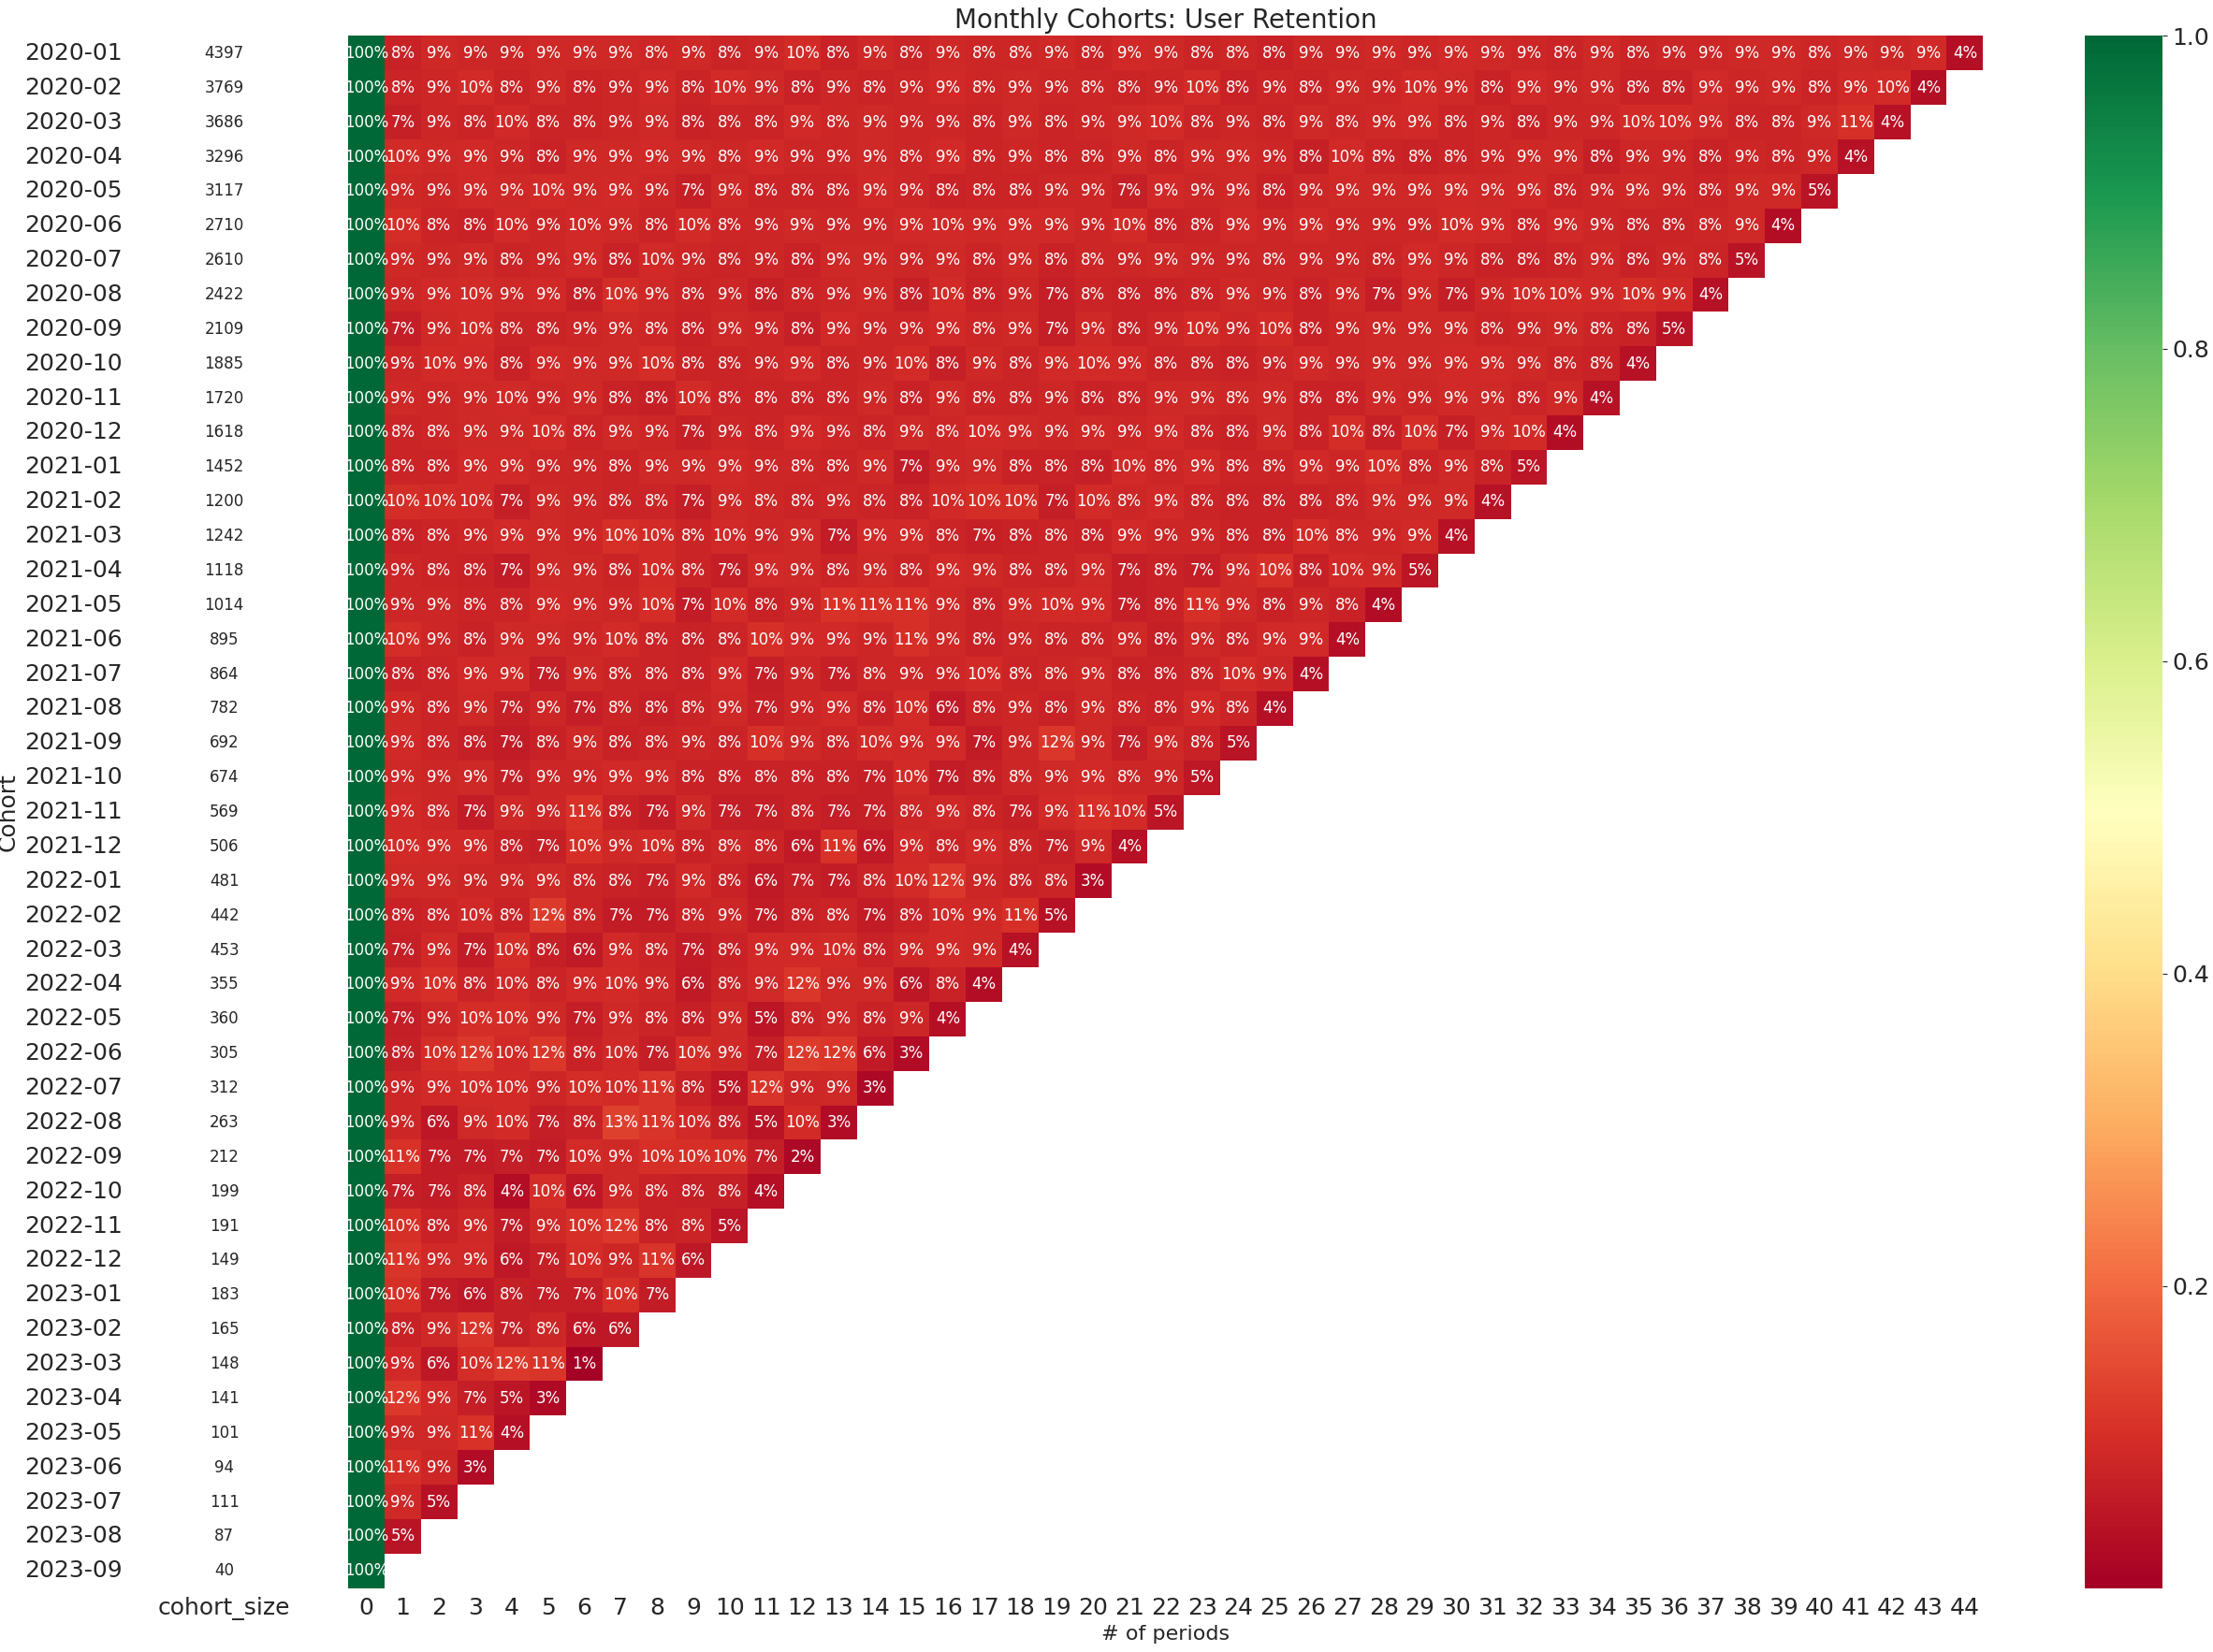

In [25]:
##Visualizing the data
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(26, 18), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn',
                annot_kws={"fontsize":12},
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=20)
    ax[1].set_xlabel('# of periods', fontsize=16)
    ax[1].set_ylabel('', fontsize=16) 
    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap,
                annot_kws={"fontsize":12},
                ax=ax[0])
    fig.tight_layout()
    plt.savefig('User Retention.png', bbox_inches='tight')

In [23]:
##Making another cohort which contatins info about purchases of different age and gender group
df2 = df[df["Order month"].astype(str).str[:4] == "2023"]
bins = [18,25,35,45,55,65,80]
labels = ["18-24", "25-34", "35-44", "45-54", "55-64", "65-79"]
df2['age_cohort'] = pd.cut(df2["Customer Age"], bins=bins, labels=labels)
df2['cohort'] = df2['age_cohort'].astype(str) + " | " + df2["Gender"]
age_pivot = pd.pivot_table(data=df2, index="cohort", values="Total Purchase Amount", columns="Order month", aggfunc="sum")
age_pivot


C:\Users\ylokt\AppData\Local\Temp\ipykernel_38836\2755398267.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['age_cohort'] = pd.cut(df2["Customer Age"], bins=bins, labels=labels)
C:\Users\ylokt\AppData\Local\Temp\ipykernel_38836\2755398267.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cohort'] = df2['age_cohort'].astype(str) + " | " + df2["Gender"]


Order month,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09
cohort,,,,,,,,,
18-24 | Female,749528,797024,690906,865092,673003,780426,922141,830858,340550
18-24 | Male,808385,698345,846495,826266,812411,737723,840934,795670,368532
25-34 | Female,1285153,1160773,1166933,1047353,1211494,1200744,1175011,1244687,588737
25-34 | Male,1038122,1012929,1203239,1021758,1128571,1143550,1047584,1190706,568693
35-44 | Female,1294567,1163040,1269716,1262948,1144796,1158114,1168134,1138677,584001
35-44 | Male,1139403,1137468,1146939,1126640,1234127,1169868,1048611,1163448,528509
45-54 | Female,1162322,1104844,1167605,1327156,1168491,1159174,1246884,1227670,580424
45-54 | Male,1139992,1180709,1145365,1184688,1197373,1135534,1196918,1175417,560153
55-64 | Female,1222037,1031638,1365028,1100742,1389498,1290838,1365830,1270158,586683


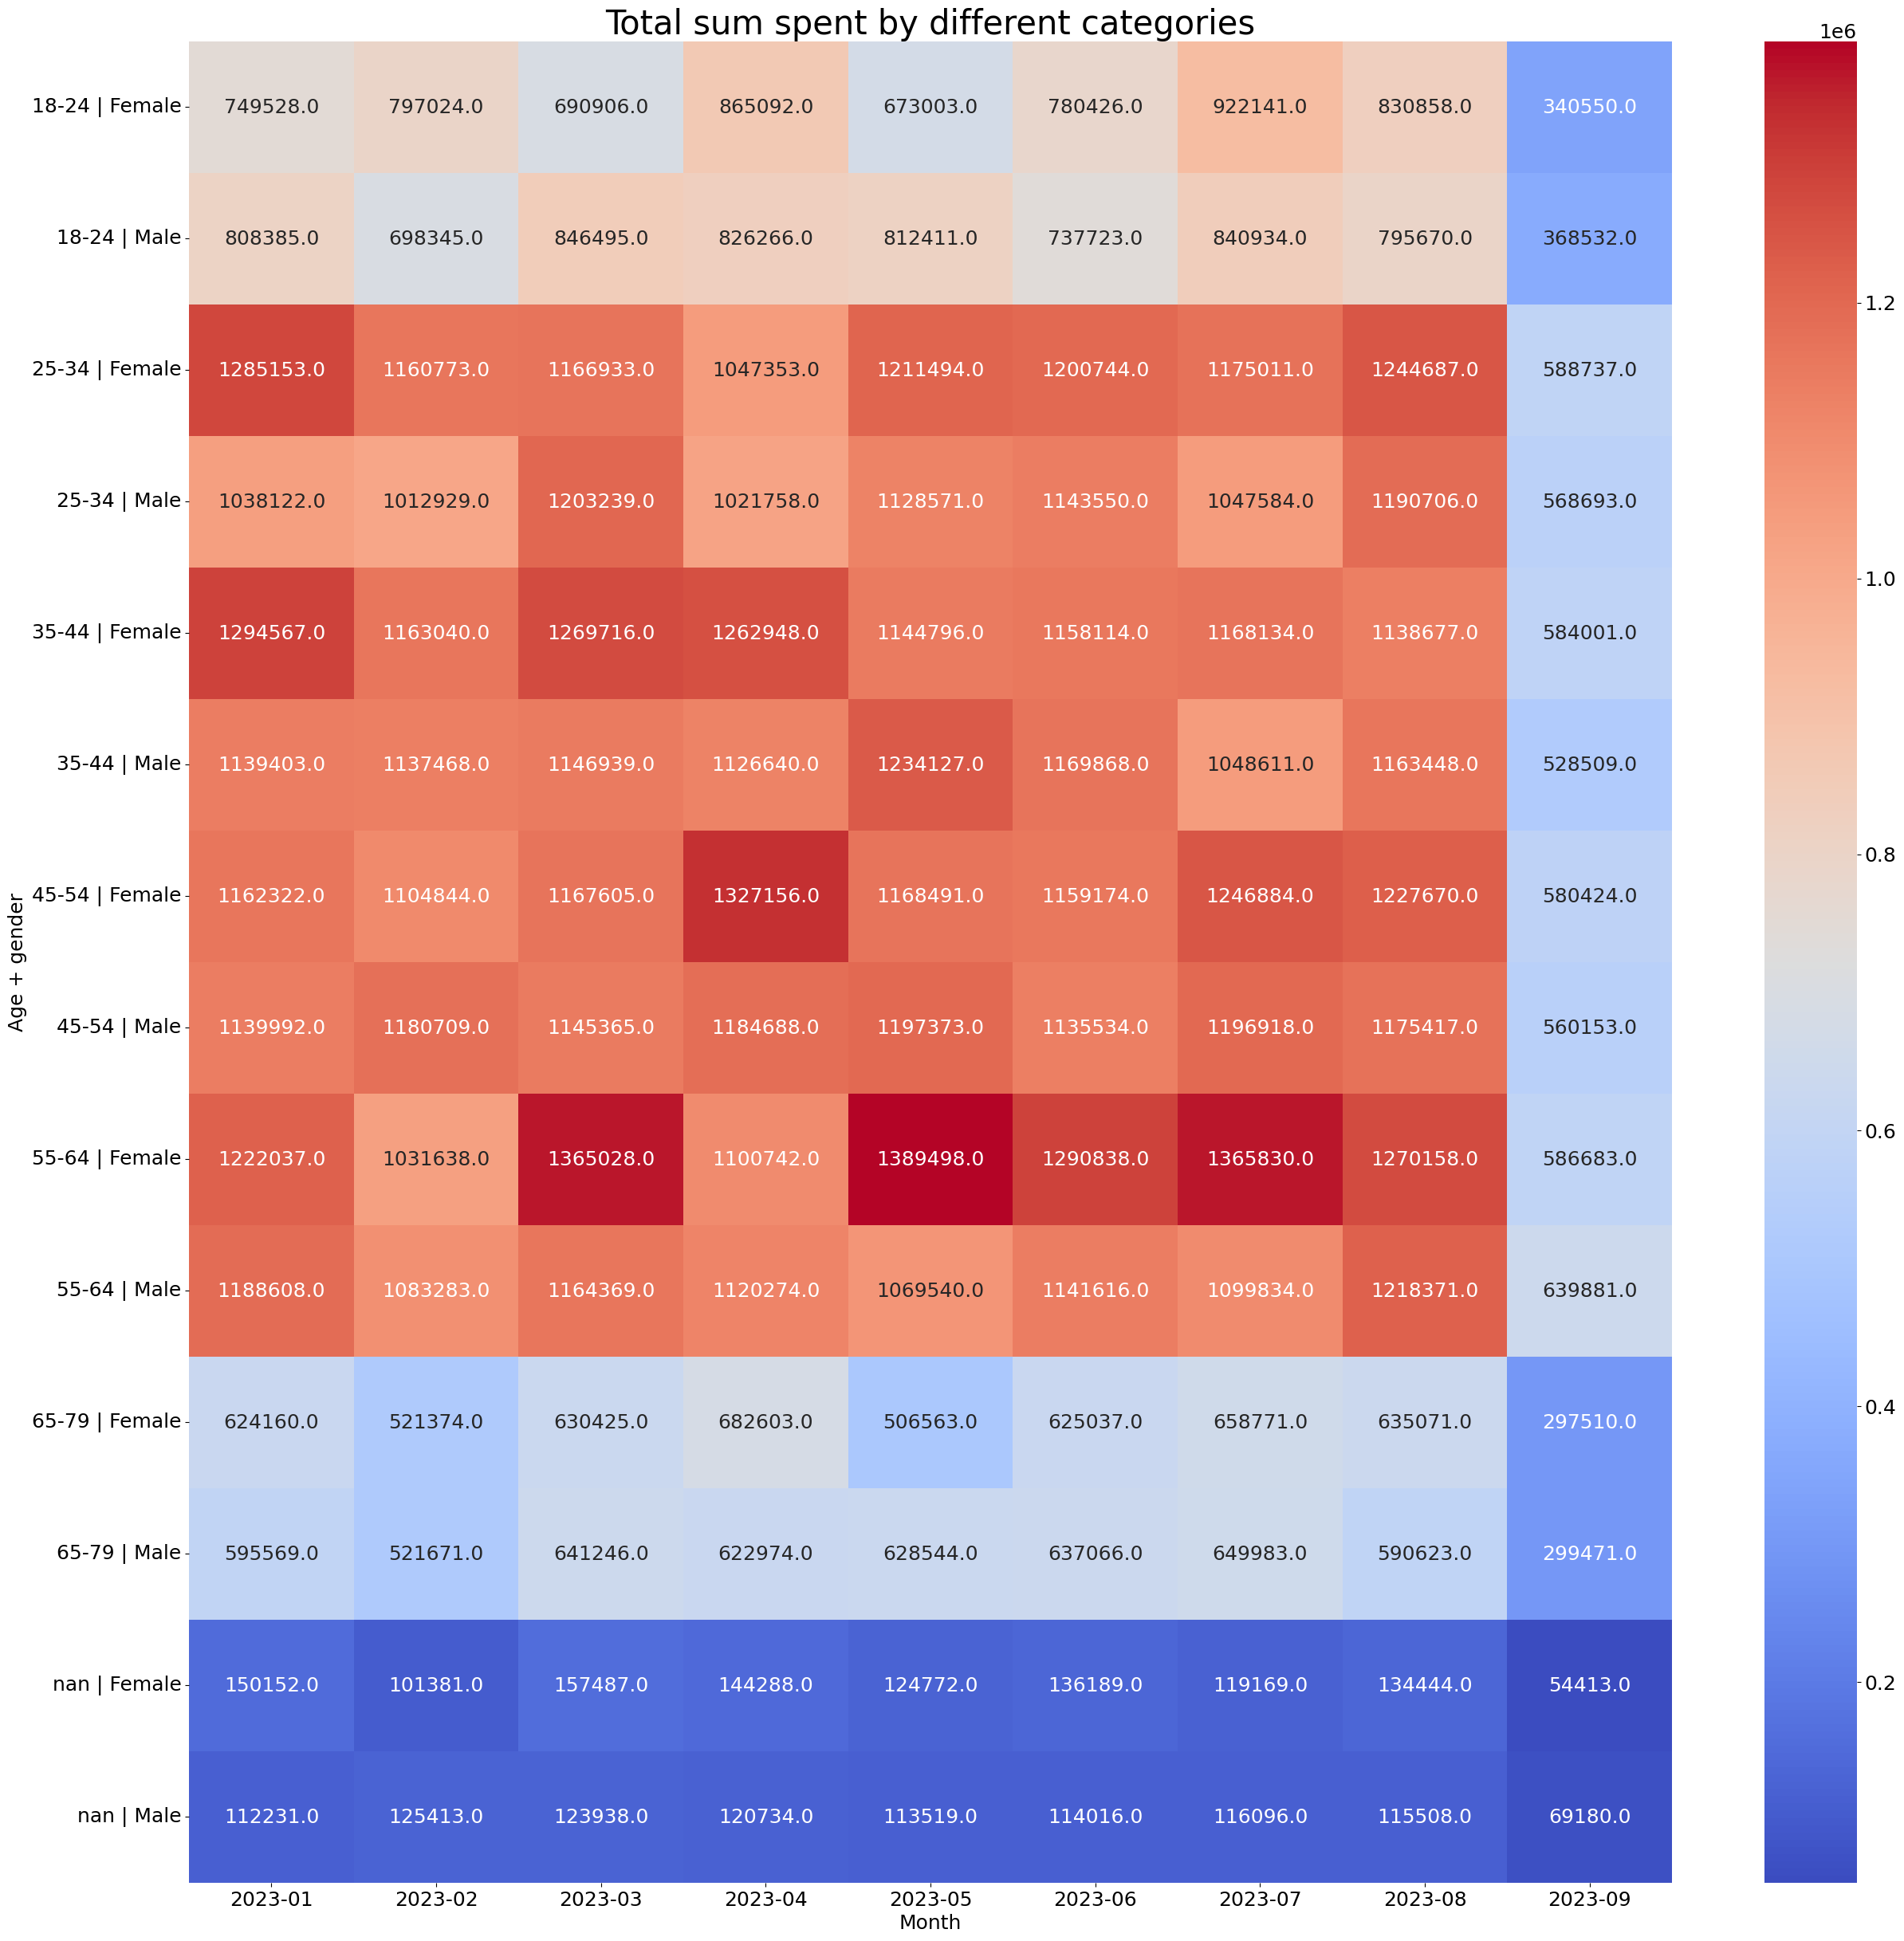

In [26]:
##Visualizing the data
plt.figure(figsize=(30,30))
sns.heatmap(age_pivot, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Total sum spent by different categories", fontsize=30)
plt.xlabel("Month")
plt.ylabel("Age + gender")
rcParams["font.size"] = 18
plt.savefig('Purchases_of_categories.png', bbox_inches='tight')
plt.show()